## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 17.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2 (в бонус идет только целое число баллов). Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5 баллов)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте две функции расстояния (1 балл)
- Евклидова метрика
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(0.5 балла)}
$$
- метрика Манхэттена
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(0.5 балла)}
$$
Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m, )`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n, )`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [2]:
def euclidian_metric(X, x):
    distances = np.sqrt(((X - y.reshape(-1, 1)) ** 2).sum(axis=1)) # your code here
    return distances

In [3]:
def manhattan_metric(X, x):
    distances = (np.abs(X - y)).sum(axis=1)# your code here
    return distances

In [4]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [5]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

In [6]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

- Реалиуйте данный класс для равномерных весов (то есть $w_i = \frac{1}{k}$) (__3 балла__)
- Реалиуйте возможность передать данному классу параметр `weights='distance'`, чтобы реализовывался взвешенный алгоритм kNN с весами, обратными расстояниям (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$, где $d(x, y)$ - функция расстояния) (__1 балл__)

В данном классе должны быть реализованы методы `.fit` и `.predict`. Однако, для удобства может оказаться полезным реализовать еще некоторые вспомогательные методы, например, функции расстояния.

In [7]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        self.weights = weights
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        
        self.X_train = X_train
        self.y_train = y_train
    
    def distances(self, x_test):
        if self.metric == 'euclid':
            return self.euclid(x_test)
            
        elif self.metric == 'manhattan':
            return self.manhattan(x_test)
            
        else:
            raise ValueError('Неизвестная метрика')
    
    def euclid(self, x_test):
        distances = np.sqrt(((self.X_train - x_test) * (self.X_train - x_test)).sum(axis=1))
        return distances
    
    def manhattan(self, x_test):
        distances = np.abs(self.X_train - x_test).sum(axis=1)
        return distances
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        
        results = []
        
        for x_test in X_test:
            distances = self.distances(x_test)
            
            idx = np.argsort(distances)
            res = self.y_train[idx[:self.k]]
            
            if self.weights == 'uniform':
                weights = np.ones_like(distances[:self.k])
            elif self.weights == 'distance':
                weights = 1 / distances[idx[:self.k]]
            else:
                raise ValueError('Проверьте правильность написания метрики')
            
            assert res.shape == (self.k,)
            
            y_pred = (res @ weights) / weights.sum()
            
            results.append(y_pred)
            
        return np.array(results)

#### Проверим, что наш knn и соответствующий knn из sklearn выдает одинаковые (ну, или почти одинаковые) результаты.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

- Проверка для евклидовой метрики

In [10]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [11]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [12]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [13]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Линейная регрессия своими руками (5 баллов)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Чему будет равна производная данной функции по $\hat{y}$?

__Вспомните, что такое вектор $\hat{y}$? Как он зависит от $X$ и $w$?__

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1 балл)

In [15]:
def huber_loss(x, y, w, delta):
    y_hat = x @ w
    if np.abs(y - y_hat) <= delta:
        return (y - y_hat) ** 2 / 2
    else:
        return delta * np.abs(y - y_hat) - delta**2 / 2


def huber_grad(x, y, w, delta):
    y_hat = x @ w
    if np.abs(y - y_hat) <= delta:
        return (y_hat - y) * x
    else:
        return np.sign(y_hat - y) * delta * x

Небольшие проверки для вашего удобства

In [16]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [17]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

Так будет выглядеть график нашей функции потерь. Можете (это не обязательное требование) проверить, что ваш результат будет выглядеть так же.

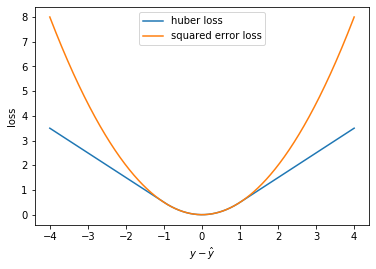

### А теперь уже и саму линейную регрессию (4 балла)

In [18]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        
        В этой функции вы должны инициализировать веса нулями, а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс на каждой итерации тоже будет неплохо)
        """
        self.w = np.zeros_like(X_train[0])
        self.loss_history = [self.calc_loss(X_train, y_train)]
        
        for _ in range(self.max_iter):
            
            w_new = self.w - self.eta * self.calc_gradient(X_train, y_train)
            self.loss_history.append(self.calc_loss(X_train, y_train))
            
            if np.linalg.norm(self.w - w_new) <= self.tol:
                self.w = w_new
                break
            
            self.w = w_new
            
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Просто предсказать ответы с помощью обученных весов
        """

        return X_test @ self.w
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """
        grad = np.zeros_like(self.w)
        
        for x_i, y_i in zip(X, y):
            grad += huber_grad(x_i, y_i, self.w, self.delta)
        
        return grad / X.shape[0]
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как сумма loss'ов для каждого 
        примера, поделить на размер выборки
        """
        
        loss = 0
        
        for x_i, y_i in zip(X, y):
            loss += huber_loss(x_i, y_i, self.w, self.delta)
        
        return loss / X.shape[0]

In [19]:
lr = LinearRegressionHuber()

In [20]:
loss_history = lr.fit(X_train, y_train)

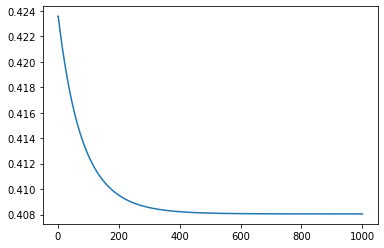

In [21]:
plt.plot(loss_history)

Постройте график зависимости функции потерь от итерации

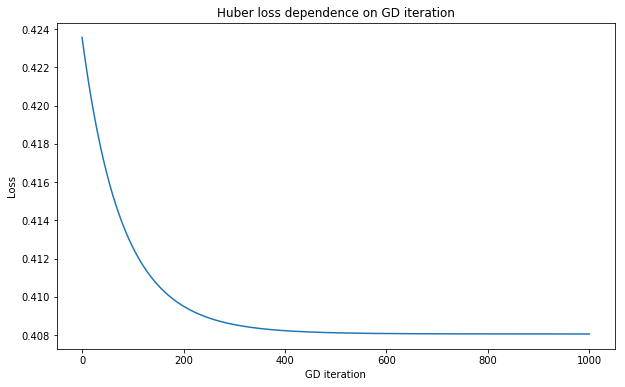

In [372]:
# your code here

# Практика (7 баллов)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [23]:
data = pd.read_csv('train.csv', header=0)

In [24]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
data.drop('Id', axis=1, inplace=True)

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете? Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [ ]:
# your code here

In [27]:
missings = (data.isnull().sum() / len(data)).sort_values(ascending=False)
missings[:20]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageCond      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageYrBlt     0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
RoofMatl        0.000000
dtype: float64

In [28]:
missings[:6].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [29]:
data.drop(missings[:6].index, axis=1, inplace=True)

In [30]:
data[missings[6:20].index]

,GarageType,GarageCond,GarageFinish,GarageQual,GarageYrBlt,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical,RoofMatl
0,Attchd,TA,RFn,TA,2003.0,Unf,No,Gd,TA,GLQ,196.0,BrkFace,SBrkr,CompShg
1,Attchd,TA,RFn,TA,1976.0,Unf,Gd,Gd,TA,ALQ,0.0,None,SBrkr,CompShg
2,Attchd,TA,RFn,TA,2001.0,Unf,Mn,Gd,TA,GLQ,162.0,BrkFace,SBrkr,CompShg
3,Detchd,TA,Unf,TA,1998.0,Unf,No,TA,Gd,ALQ,0.0,None,SBrkr,CompShg
4,Attchd,TA,RFn,TA,2000.0,Unf,Av,Gd,TA,GLQ,350.0,BrkFace,SBrkr,CompShg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Attchd,TA,RFn,TA,1999.0,Unf,No,Gd,TA,Unf,0.0,None,SBrkr,CompShg
1456,Attchd,TA,Unf,TA,1978.0,Rec,No,Gd,TA,ALQ,119.0,Stone,SBrkr,CompShg
1457,Attchd,TA,RFn,TA,1941.0,Unf,No,TA,Gd,GLQ,0.0,None,SBrkr,CompShg
1458,Attchd,TA,Unf,TA,1950.0,Rec,Mn,TA,TA,GLQ,0.0,None,FuseA,CompShg


In [31]:
for c in missings[6:20].index:
    if c != 'GarageYrBlt' and c != 'MasVnrArea':
        data[c].fillna(data[c].mode()[0], inplace=True)
    else:
        data[c].fillna(data[c].mean(), inplace=True)
data.isnull().any().any()

False

## 2 (0.5 балла)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование.

In [ ]:
# your code here

In [32]:
categorical = []
for c in data.columns:
    if data[c].dtype == 'O':
        categorical.append(c)
categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [33]:
data = pd.concat([data.drop(categorical, axis=1), pd.get_dummies(data[categorical])], axis=1)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


## 3 (0.5 балла)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# your code here

In [35]:
data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


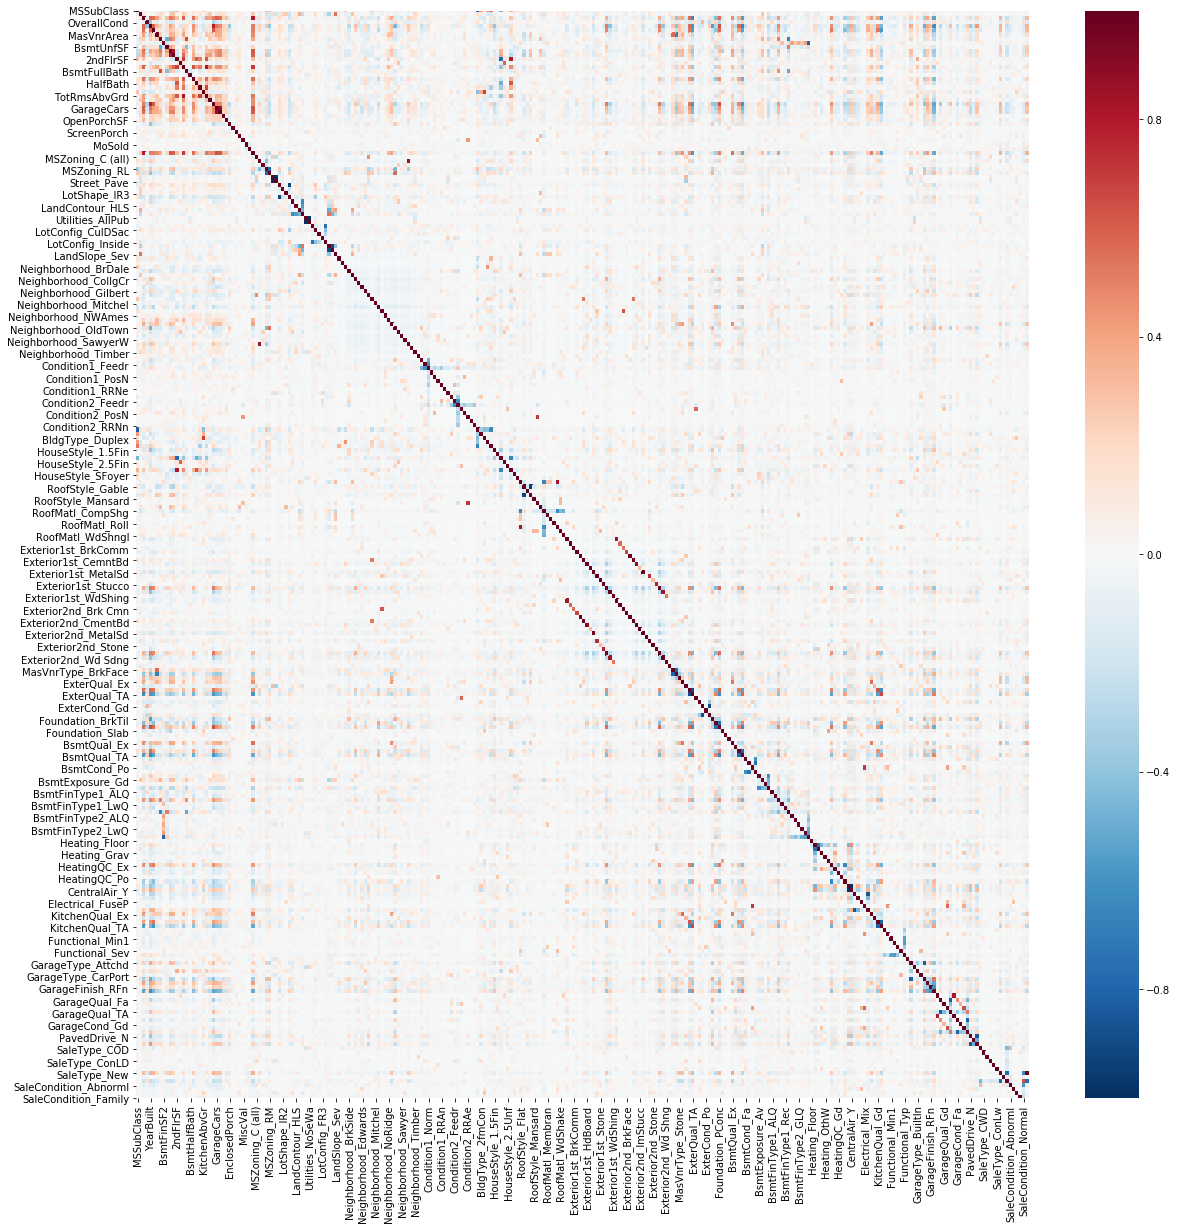

In [36]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), ax=ax, cmap='RdBu_r')

## 5 (0.5 балла)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [ ]:
# your code here

In [37]:
import numpy as np
corrs = np.abs(data.corr()).loc['SalePrice'].drop('SalePrice')
print("Max correlation: ", corrs[corrs == corrs.max()])
print("Min correlation: ", corrs[corrs == corrs.min()])

Max correlation:  OverallQual    0.790982
Name: SalePrice, dtype: float64
Min correlation:  BsmtFinType2_GLQ    0.000076
Name: SalePrice, dtype: float64


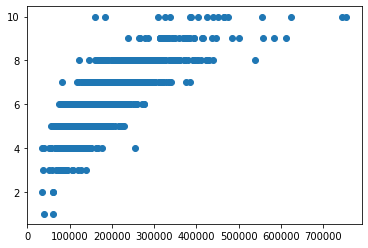

In [38]:
plt.scatter(data['SalePrice'], data['OverallQual'])
plt.show()

In [39]:
corrs = np.abs(data.corr()).loc['SalePrice'].drop('SalePrice')
print("Max correlation: ", corrs[corrs == corrs.max()])
print("Min correlation: ", corrs[corrs == corrs.min()])

Max correlation:  OverallQual    0.790982
Name: SalePrice, dtype: float64
Min correlation:  BsmtFinType2_GLQ    0.000076
Name: SalePrice, dtype: float64


In [40]:
np.abs(data.corr()).loc['SalePrice'].drop('SalePrice')

MSSubClass               0.084284
LotArea                  0.263843
OverallQual              0.790982
OverallCond              0.077856
YearBuilt                0.522897
                           ...   
SaleCondition_AdjLand    0.050686
SaleCondition_Alloca     0.015525
SaleCondition_Family     0.046480
SaleCondition_Normal     0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 269, dtype: float64

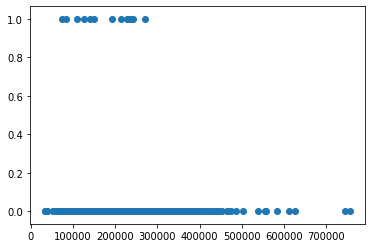

In [41]:
plt.scatter(data['SalePrice'], data['BsmtFinType2_GLQ'])
plt.show()

## 6 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

In [ ]:
# your code here

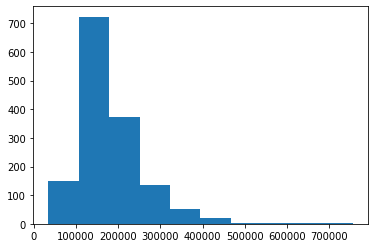

In [42]:
plt.hist(data['SalePrice']);

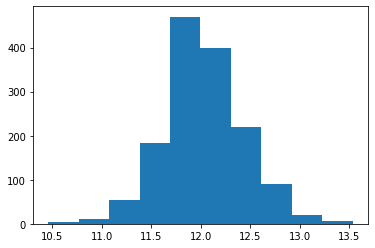

In [43]:
plt.hist(np.log1p(data['SalePrice']));

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [44]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1),
                                                  np.log1p(data['SalePrice']), random_state=17032019)

In [45]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 269), (365, 269), (1095,), (365,))

## 7 (2 балла)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

(Если вдруг забыли что такое Lasso и Ridge - https://habr.com/ru/post/328760/)

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [ ]:
# your code here

In [46]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print('Train:', np.sqrt(mean_squared_error(y_train, knn.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, knn.predict(X_val))))

Train: 0.18453525416885153
Validation: 0.219010117736066


In [47]:
pp = Pipeline([('scaler', StandardScaler()), ('regressor', KNeighborsRegressor())])
pp.fit(X_train, y_train)
print('Train:', np.sqrt(mean_squared_error(y_train, pp.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, pp.predict(X_val))))

Train: 0.16958796319690564
Validation: 0.20462598250740302


In [48]:
estimators = np.arange(1, 100, 2)
pp = Pipeline([('scaler', StandardScaler()), ('regressor', KNeighborsRegressor())])
gridKnn = GridSearchCV(estimator=pp, param_grid={'regressor__n_neighbors': estimators})
gridKnn.fit(X_train, y_train)
gridKnn.best_estimator_

/Users/danyache/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [49]:
pp = gridKnn.best_estimator_
pp.fit(X_train, y_train)
print('Train:', np.sqrt(mean_squared_error(y_train, pp.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, pp.predict(X_val))))

Train: 0.16958796319690564
Validation: 0.20462598250740302


In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print('Train:', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, lr.predict(X_val))))

Train: 0.09013082648219016
Validation: 0.13265440244053683


In [52]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print('Train:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, lasso.predict(X_val))))

Train: 0.11596674081292482
Validation: 0.12150935605822663


In [53]:
ridge = Ridge(alpha=30)
ridge.fit(X_train, y_train)
print('Train:', np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, ridge.predict(X_val))))

Train: 0.1182344079414567
Validation: 0.1261085966864835


## 8 (0.5 балла)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

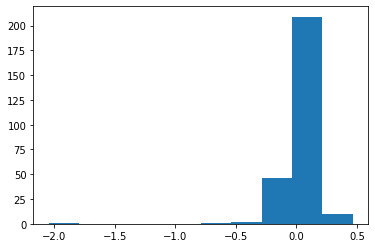

In [54]:
plt.hist(lr.coef_);

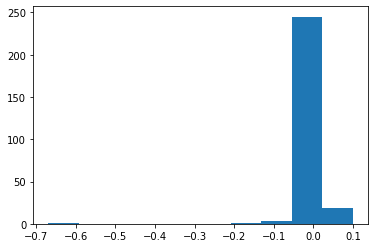

In [55]:
plt.hist(lasso.coef_);

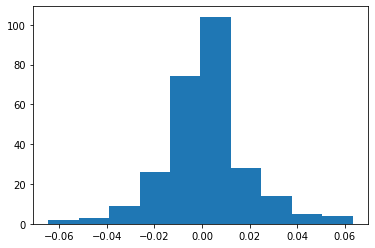

In [56]:
plt.hist(ridge.coef_);

## 9 (0.5 балла)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (1 балл)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

In [57]:
pp = Pipeline([('selector', SelectFromModel(Lasso(alpha=0.001))), ('regressor', LinearRegression())])
pp.fit(X_train, y_train)
print('Train:', np.sqrt(mean_squared_error(y_train, pp.predict(X_train))))
print('Validation:', np.sqrt(mean_squared_error(y_val, pp.predict(X_val))))

Train: 0.10098259851855385
Validation: 0.12064847748117584


# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Вычислите производную сигмоидной функции

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

и выразите ее через $\sigma(x)$.

*(your solution here)*

 $ \sigma$'(x) = ($\frac{1}{1 + e^{-x}})'$ = $((1 + e^{-x})^{-1})'$ = -1 * $(1 + e^{-x})^{-2}$ * $((1 + e^{-x})'$ = -$(1 + e^{-x})^{-2}$ * $(-e^{-x})$ = $\frac{e^{-x}}{(1 + e^{-x})^{2}} = \frac{((1 + e^{-x} - 1)}{(1 + e^{-x})^{2}} = \frac{(1 + e^{-x})}{(1 + e^{-x})^{2}} - \frac{1}{(1 + e^{-x})^{2}} = \frac{1}{(1 + e^{-x})} - (\frac{1}{(1 + e^{-x})})^{2}$ = $\sigma(x)$ - $\sigma^{2}(x)$ = $\sigma(x)$(1 - $\sigma(x)$)
 

## 2* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Вам может показаться полезной эта ссылка https://medium.com/@gennadylaptev/median-and-mae-3e85f92df2d7

*(your solution here)*